# 学習のメカニズム
単一ニューロン学習するメカニズムを解説します。  
これにより、ニューラルネットワークが学習する仕組みの基礎を学びます。

### 単一ニューロンの学習
通常、ニューラルネットワークは複数のニューロンからなる層が重なって構成されます。
しかしながら、本セクションでは簡単にするため単一ニューロンを用いてシンプルな学習を行います。  
以下の図は、今回学習に用いるニューロンです。
<center>
<img src="images/single_neuron.png">
</center>
ニューロンには通常複数の入力がありますが、今回は入力は1つのみとします。  
このニューロンの入力をx座標、出力をy座標として、ある曲線を描くことができるようにニューロンを訓練します。

### 順伝播の式
今回のニューロンにおいて、順伝播は以下の式で表されます。

（式 1）
$$u = xw + b$$
$$y = f(u)$$

$x$が入力、$y$が出力です。  
$w$は重みと呼ばれるパラメータ、$b$はバイアスと呼ばれるパラメータです。  
これらのパラメータの調整により、ニューロンでは学習が行われます。  

入力と重みの積にバイアスを足したものを$u$とし、$u$を活性化関数と呼ばれる関数に入れます。  
上記の式では、$f$が活性化関数です。  
$f$により、出力$y$を得ることができます。  

活性化関数には様々な種類がありますが、今回はシグモイド関数という関数を使います。  
シグモイド関数は以下の式で表されます。  

$$y = \frac{1}{1+\exp(-u)}$$ 

### 誤差の定義
ニューロンの出力と正解の誤差を定義します。  
この誤差を小さくするように、重みとバイアスを調整することで学習が行われます。

今回は、出力と正解の差を2乗して1/2をかけたものを誤差とします。  

$$E=\frac{1}{2}(t-y)^2$$

$E$が誤差、$t$が正解、$y$が出力です。  


### 正解の設定
学習に用いる正解を作成します。  
sin関数を用いてを正解を作成します。  

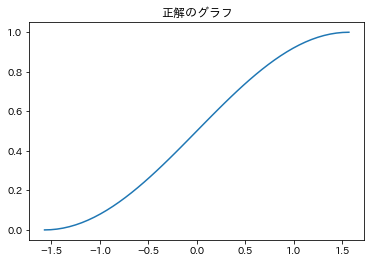

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# -- 入力と正解の用意 --
input_data = np.linspace(-np.pi/2, np.pi/2)  # 入力
correct_data = (np.sin(input_data) + 1)/2    # 正解 0-1の範囲に収める

# グラフに描画してみる
plt.plot(input_data, correct_data)
plt.title('正解のグラフ')
plt.show()

学習の際は出力がこの正解に近くなるように学習を行います。

### 重みとバイアスの更新
以下の式を使って重みとバイアスを更新することにより、学習が行われます。

$$ w \leftarrow w-\eta\frac{\partial E}{\partial w} $$

$$ b \leftarrow b-\eta\frac{\partial E}{\partial b} $$

矢印は重みやバイアスの更新を表します。  
誤差$E$を重み$w$で偏微分することにより、重みの変化に対する誤差の変化の割合$\frac{\partial E}{\partial w}$を求めることができます。  
この値が大きければ、重みの変化に対して誤差が変化することになります。  
また、この値が小さければ、重みが変化しても誤差はあまり変化しないことなります。  

上記の式では、誤差が大きく変化する際は重みを大きく変化させ、誤差が変化しないばあいはあまり誤差を変化させません。
これにより、誤差が変化しなくなるまで重みが更新されることになります。  
バイアスの場合も同様です。

なお、$\eta$（イータ）は学習係数と呼ばれる定数で、通常は0.1や0.01などの小さい値に設定します。  
$\frac{\partial E}{\partial w}$を**勾配**と呼びますが、上記の式により重みとバイアスの更新を行うためには、まず勾配を求める必要があります。

### 重みの勾配

重みとバイアスの勾配を求めます。  

まずは重みの勾配、すなわち$\frac{\partial E}{\partial w}$を求めます。  

重みの勾配は、微分のセクションで解説した連鎖律を用いて以下のように展開できます。

（式 2）
$$ \frac{\partial E}{\partial w}=\frac{\partial E}{\partial u}\frac{\partial u}{\partial w} $$

以前に（式 1）で表した$u$を使っています。  

ここで、右辺の$\frac{\partial u}{\partial w}$の部分は、$x$が入力、$b$がバイアスなので次のように表せます。

（式 3）
$$ \begin{aligned} \\
\frac{\partial u}{\partial w} & = \frac{\partial (x w + b)}{\partial w} \\
& = x 
\end{aligned} $$

（式 2）式の右辺の$\frac{\partial E}{\partial u}$の部分は、出力$y$を用いた連鎖律により次のようになります。

$$ \frac{\partial E}{\partial u} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial u} $$ 

すなわち、誤差を出力で偏微分したものと、出力を$u$で偏微分したものの積になります。  
前者は、次のように誤差を偏微分することで求めることができます。

$$\frac{\partial E}{\partial y} = \frac{\partial}{\partial y}(\frac{1}{2}(t-y)^2) = y-t$$

後者は、活性化関数を偏微分することで求めることができます。   
活性化関数にはシグモイド関数を使いますが、シグモイド関数$f(x)$の導関数は、

$$f'(x)=(1-f(x))f(x)$$

となります。（興味のある方は各自導出してみてください）  
従って、$\frac{\partial y}{\partial u}$は次のようになります。

$$ \begin{aligned} \\
\frac{\partial y}{\partial u} & = (1-y)y
\end{aligned} $$

ここで、次のように$\delta$(デルタ)を設定しておきます。  

（式 4）
$$ \delta = \frac{\partial E}{\partial u} = \frac{\partial E}{\partial y}\frac{\partial y}{\partial u} = (y-t)(1-y)y $$ 

この$\delta$は、バイアスの勾配を求める際にも使用します。  
（式 3）と（式 4）により、（式 2）は次の形になります。

$$ \frac{\partial E}{\partial w} = x\delta $$

重みの勾配$\frac{\partial E}{\partial w}$を、$x$と$\delta$の積として表すことができました。 

### バイアスの勾配
バイアスの勾配も同様にして求めることができます。  
バイアスの場合、連鎖律により以下の関係が成り立ちます。

（式 5）
$$ \frac{\partial E}{\partial b}=\frac{\partial E}{\partial u}\frac{\partial u}{\partial b} $$

このとき、右辺の$\frac{\partial u}{\partial b}$の部分は次のようになります。  

$$ \begin{aligned} \\
\frac{\partial u}{\partial b} & = \frac{\partial(xw+b)}{\partial b} \\
& = 1 
\end{aligned} $$

（式 5）における$\frac{\partial E}{\partial u}$の部分は、重みの勾配の場合と変わらないので、同様に$\delta$とします。  
以上のの結果を踏まえて、（式 5）は次の形になります。

$$ \frac{\partial E}{\partial b} = \delta $$

このように、バイアスの場合勾配は$\delta$に等しくなります。 

以上により、重みとバイアスの勾配を、それぞれ$\delta$を用いたシンプルな式で表すことができました。  
これらの勾配を使って、重みとバイアスを更新することにより学習が行われます。  

次回は、今回学んだ内容をコードに落とし込み、実際に学習を行います。